# WALMART SALES FORECASTING

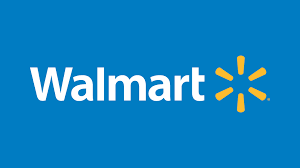

##### OVERVIEW:
    
Historical sales data for 45 Walmart stores located in different regions are available. There are certain events and holidays which impact sales on each day. The business is facing a challenge due to unforeseen demands and runs out of stock some times, due to inappropriate machine learning algorithm. Walmart would like to predict the sales and demand accurately. An ideal ML algorithm will predict demand accurately and ingest factors like economic conditions including CPI, Unemployment Index, etc. 

##### PROBLEM STATEMENT:

A retail store that has multiple outlets across the country are facing issues in managing the
inventory - to match the demand with respect to supply.As a data scientist, I have extracted valuable insights from the Walmart sales dataset and built prediction models to forecast sales for the next 3 years. These models consider historical patterns and influential factors, enabling data-driven decision-making and optimization of sales strategies.

The objective is to determine the factors affecting the sales and to analyze the impact of markdowns around holidays on the sales.

###### DATASET OVERVIEW:

The walmart.csv contains 6435 rows and 8 columns.

FEATURE INFORMATION

Store:                    Store number

Date :                    Week of Sales

Weekly_Sales:             Sales for the given store in that week

Holiday_Flag:             If it is a holiday week

Temperatur:               Temperature on the day of the sale

Fuel_Price:               Cost of the fuel in the region

CPI:                      Consumer Price Index

Unemployment:             Unemployment Rate

# **We aim to solve the problem statement by creating a plan of action, Here are some of the necessary steps:**
1. Data Exploration
2. Exploratory Data Analysis (EDA)
3. Data Pre-processing
4. Data Manipulation
5. Feature Selection/Extraction
6. Predictive Modelling
7. Project Outcomes & Conclusion

# Step 1 : Reading and Understanding Data

In [2]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
import seaborn as sns
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import make_classification
from datetime import timedelta
import calendar
from datetime import datetime

In [8]:
wal=pd.read_csv('Walmart (1).csv')
wal.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [182]:
wal.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [183]:
wal.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [10]:
wal.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [185]:
wal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [13]:
print(wal.shape)

(6435, 8)


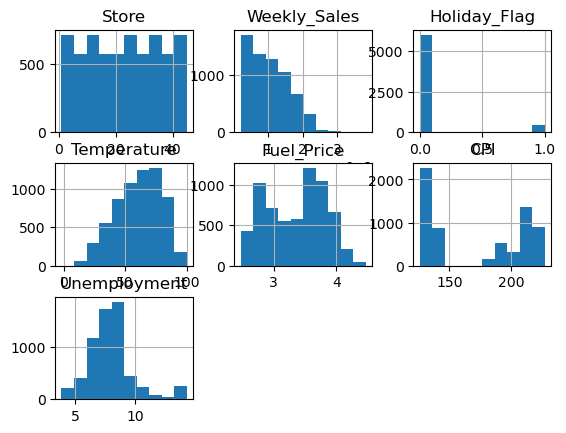

In [14]:
wal.hist()
plt.show()

In [186]:
wal['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [187]:
wal['Holiday_Flag'].value_counts()

0    5985
1     450
Name: Holiday_Flag, dtype: int64

# Step 2 : Data Cleansing and Manipulation

In [7]:
wal['Weekly_Sales']=wal.Weekly_Sales/1000

In [6]:
wal['Date']=pd.to_datetime(wal['Date'])
wal["Day"]=wal.Date.dt.day
wal["Month"]=wal.Date.dt.month
wal["Year"]=wal.Date.dt.year

C:\Users\Ajeeth S\AppData\Local\Temp\ipykernel_4660\1860520091.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  wal['Date']=pd.to_datetime(wal['Date'])


In [194]:
avg_weekly_sales=wal.groupby('Store')['Weekly_Sales'].sum()
avg_weekly_sales=pd.DataFrame(avg_weekly_sales).reset_index()
avg_weekly_sales

,Store,Weekly_Sales
0,1,222402.80885
1,2,275382.44098
2,3,57586.73507
3,4,299543.95338
4,5,45475.68890
5,6,223756.13064
6,7,81598.27514
7,8,129951.18113
8,9,77789.21899
9,10,271617.71389


In [195]:
wal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   Day           6435 non-null   int64         
 9   Month         6435 non-null   int64         
 10  Year          6435 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(5)
memory usage: 553.1 KB


In [197]:
wal["Date"]=pd.to_datetime(wal.Date)
wal['Month'] = wal['Month'].apply(lambda x: calendar.month_abbr[x])

In [199]:
wal['Week'] = wal.Date.dt.isocalendar().week 
wal_weeks = wal.groupby('Week').sum()

# Step 3: Data visualisation and EDA

(array([1697., 1367., 1270., 1049.,  668.,  314.,   38.,   20.,    3.,
           9.]),
 array([ 209986.25,  570856.27,  931726.29, 1292596.31, 1653466.33,
        2014336.35, 2375206.37, 2736076.39, 3096946.41, 3457816.43,
        3818686.45]),
 <BarContainer object of 10 artists>)

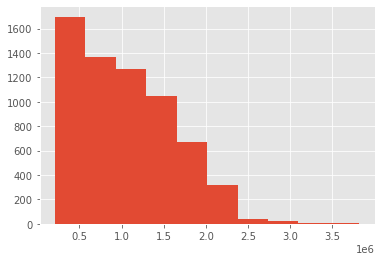

In [189]:
plt.hist(wal['Weekly_Sales'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Year', ylabel='count'>

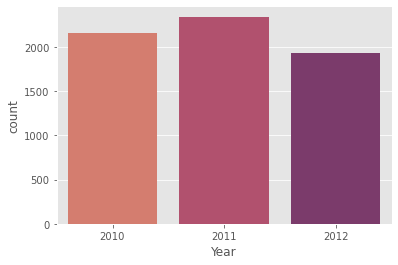

In [191]:
sns.countplot(wal['Year'],palette='flare')

<AxesSubplot:>

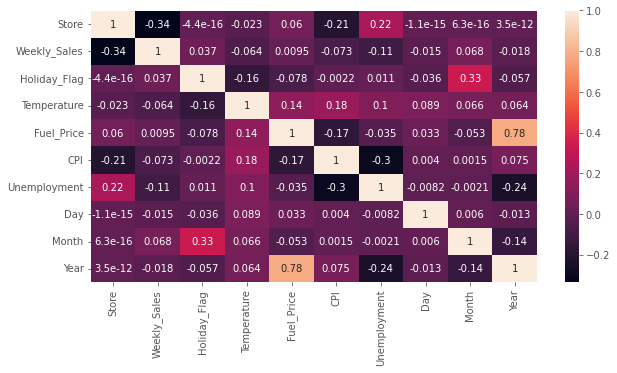

In [196]:
correlation = wal.corr()
plt.figure(figsize=(10,5))
sns.heatmap(correlation,annot = True)

In [198]:
wal.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-05-02,1643.69090,0,42.31,2.572,211.096358,8.106,2,May,2010
1,1,2010-12-02,1641.95744,1,38.51,2.548,211.242170,8.106,2,Dec,2010
2,1,2010-02-19,1611.96817,0,39.93,2.514,211.289143,8.106,19,Feb,2010
3,1,2010-02-26,1409.72759,0,46.63,2.561,211.319643,8.106,26,Feb,2010
4,1,2010-05-03,1554.80668,0,46.50,2.625,211.350143,8.106,3,May,2010


In [200]:
import plotly.express as px

fig = px.line( data_frame = wal_weeks, x = wal_weeks.index, y = 'Weekly_Sales', labels = {'Weekly_Sales' : 'Weekly Sales', 'x' : 'Weeks' }, title = 'Sales over weeks')
fig.update_traces(line_color='black', line_width=1)

<AxesSubplot:xlabel='Store', ylabel='Weekly_Sales'>

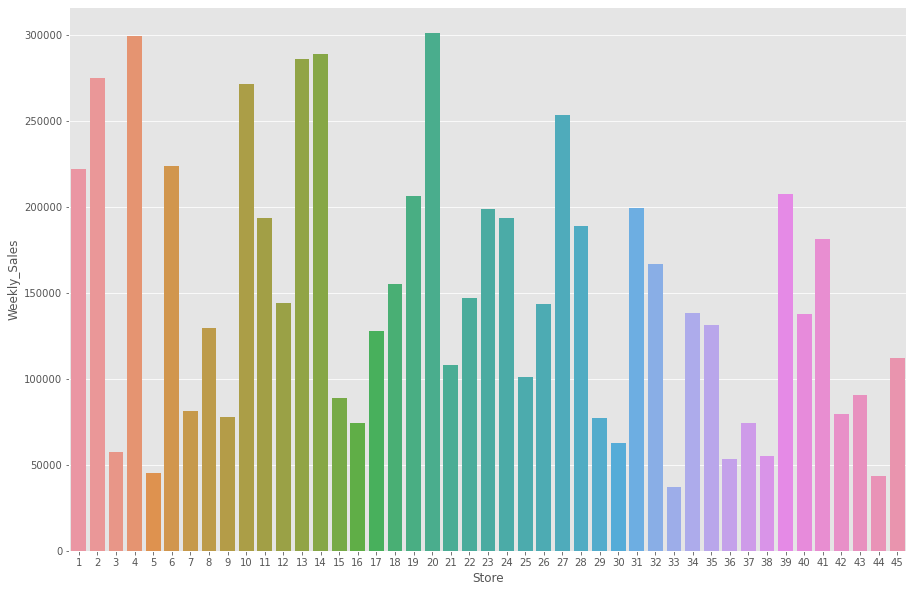

In [201]:

fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(x=avg_weekly_sales['Store'], y=avg_weekly_sales['Weekly_Sales'], ax=ax)


<AxesSubplot:xlabel='Store', ylabel='Weekly_Sales'>

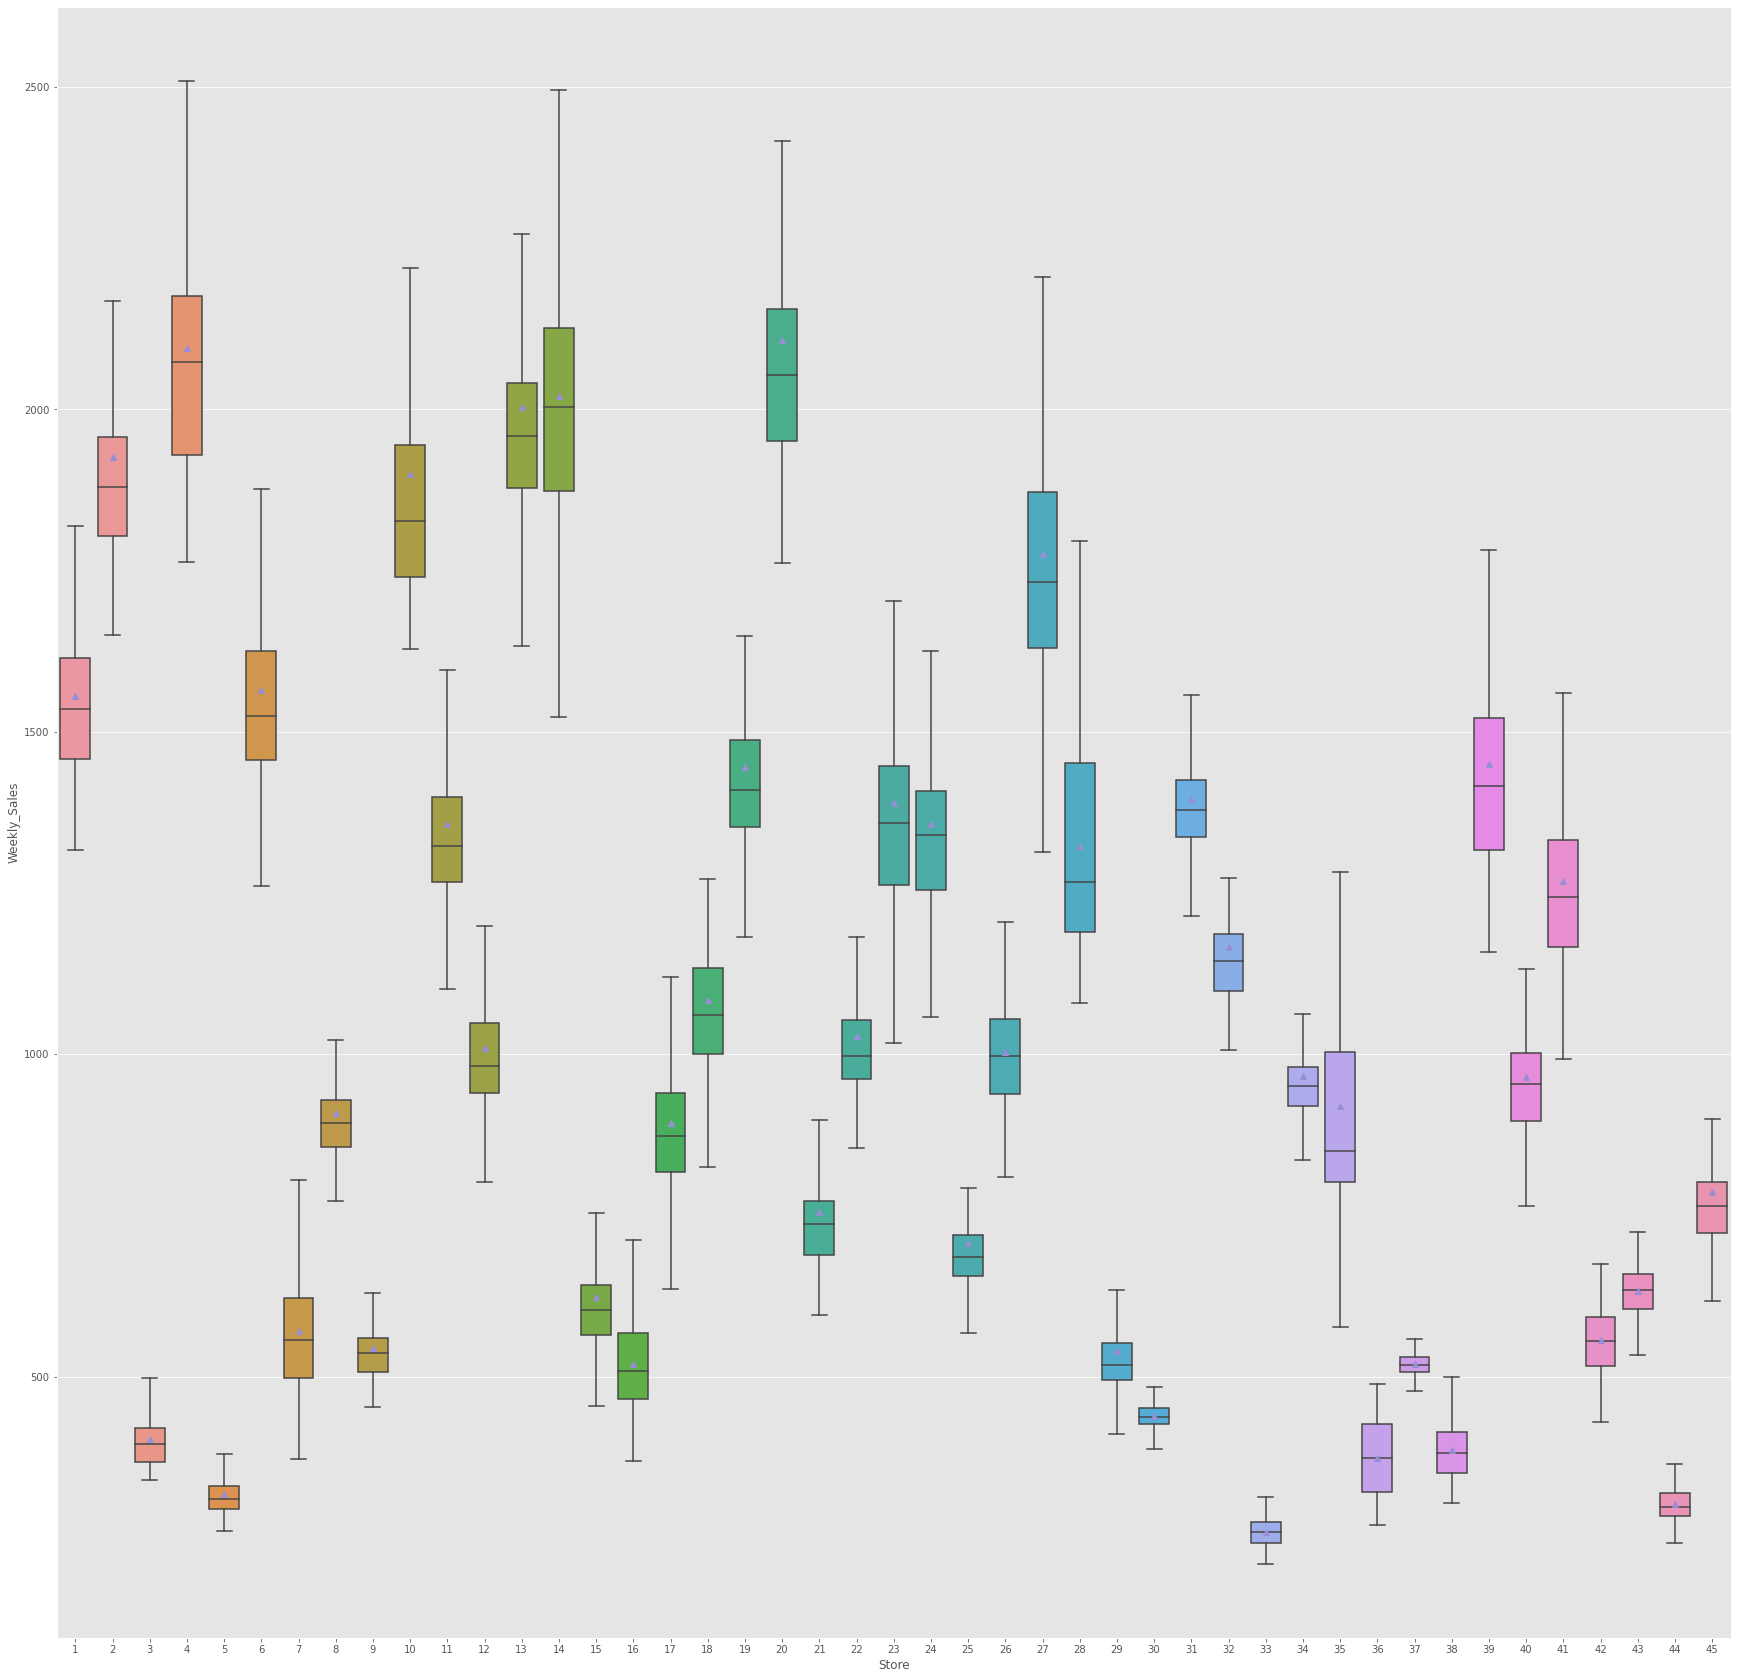

In [204]:
plt.figure(figsize = (30,30))
sns.boxplot(x = 'Store', y ='Weekly_Sales', data = wal, showfliers = False,showmeans = True)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



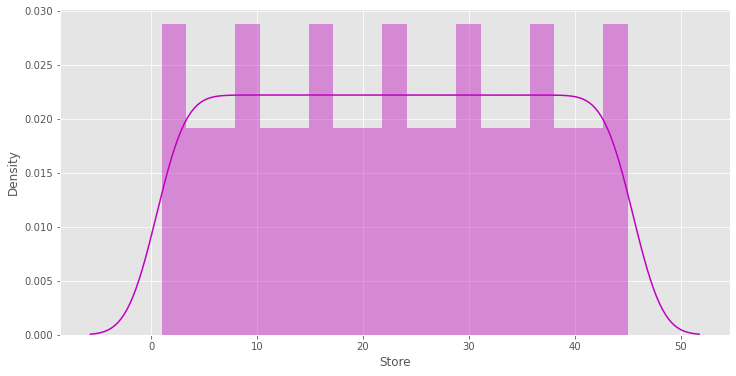

In [70]:
plt.figure(figsize=(12,6))
sns.distplot(wal['Store'],color='m')
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



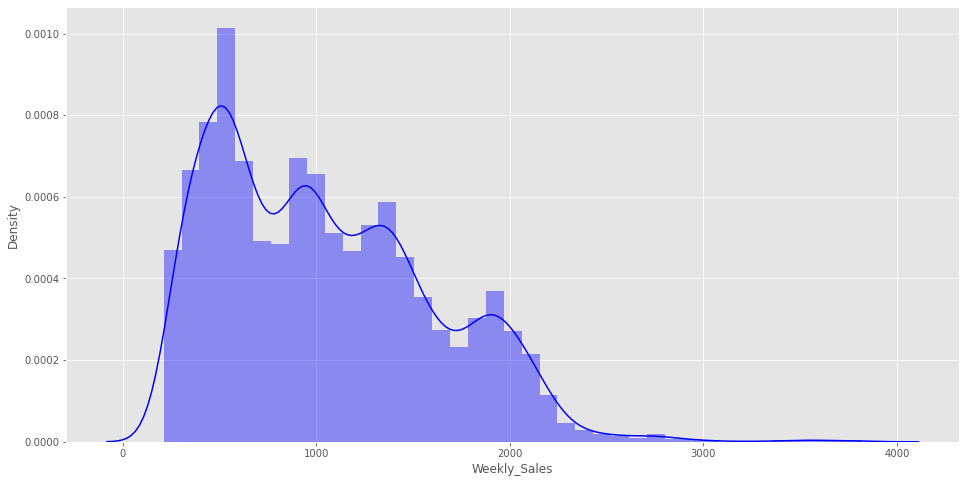

In [72]:
plt.figure(figsize=(16,8))
sns.distplot(wal['Weekly_Sales'],color='b')
plt.show()

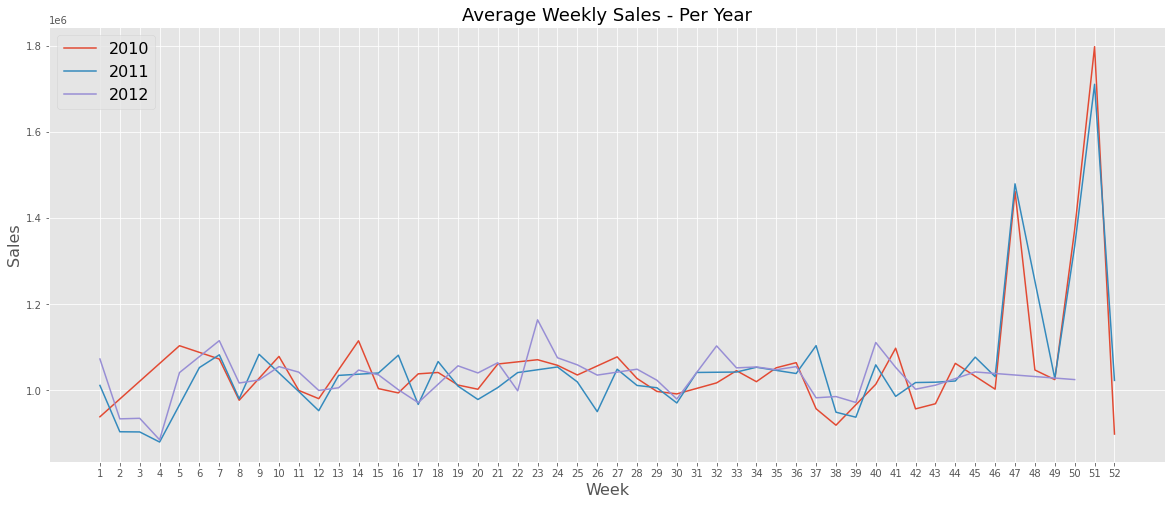

In [172]:
weekly_sales_2010 = weekly_sales_2010.reset_index()
weekly_sales_2011 = weekly_sales_2011.reset_index()
weekly_sales_2012 = weekly_sales_2012.reset_index()
plt.figure(figsize=(20,8))
sns.lineplot(data=weekly_sales_2010, x='Week', y='Weekly_Sales')
sns.lineplot(data=weekly_sales_2011, x='Week', y='Weekly_Sales')
sns.lineplot(data=weekly_sales_2012, x='Week', y='Weekly_Sales')
plt.xticks(np.arange(1, 53, step=1))
plt.legend(['2010', '2011', '2012'], loc='best', fontsize=16)
plt.title('Average Weekly Sales - Per Year', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Week', fontsize=16)
plt.show()


In [209]:
px.histogram(wal, x='Fuel_Price', y ='Weekly_Sales', color='Holiday_Flag')#, marginal='box')

In [112]:
px.histogram(wal, x='Temperature', y ='Weekly_Sales',color='Holiday_Flag')#, marginal='box')

In [113]:
px.histogram(wal, x='CPI', y ='Weekly_Sales', color='Holiday_Flag')#, marginal='box')

# Step 4 : Data Preparation

In [136]:

Store_31 = wal[wal.Store == 31]
Sales_31 = pd.DataFrame(Store_31.Weekly_Sales.groupby(Store_31.index).sum())
Sales_31.reset_index(inplace = True)
Sales_31['Date'] = pd.to_datetime(Sales_31['Date'])
Sales_31.set_index('Date',inplace = True)

In [137]:
Sales_31.dtypes
Sales_31.head()

,Weekly_Sales
Date,
2010-01-10,1213.98164
2010-02-04,1357.60068
2010-02-07,1311.70492
2010-02-19,1473.38675
2010-02-26,1344.35441


In [138]:
Store_15 = wal[wal.Store == 15]
Sales_15 = pd.DataFrame(Store_15.Weekly_Sales.groupby(Store_15.index).sum())
Sales_15.dtypes
Sales_15.head(2)
Sales_15.reset_index(inplace = True)
Sales_15['Date'] = pd.to_datetime(Sales_15['Date'])
Sales_15.set_index('Date',inplace = True)

In [139]:
Store_40 = wal[wal.Store == 22]
Sales_40 = pd.DataFrame(Store_40.Weekly_Sales.groupby(Store_40.index).sum())
Sales_40.dtypes
Sales_40.head(2)
Sales_40.reset_index(inplace = True)
Sales_40['Date'] = pd.to_datetime(Sales_40['Date'])
Sales_40.set_index('Date',inplace = True)

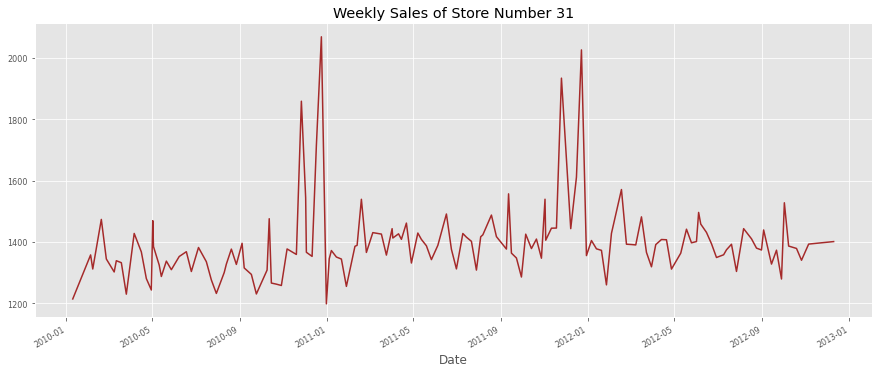

In [140]:
Sales_31.Weekly_Sales.plot(figsize=(15,6), title= 'Weekly Sales of Store Number 31', fontsize=8, color = 'brown')
plt.show()

<Figure size 432x288 with 0 Axes>

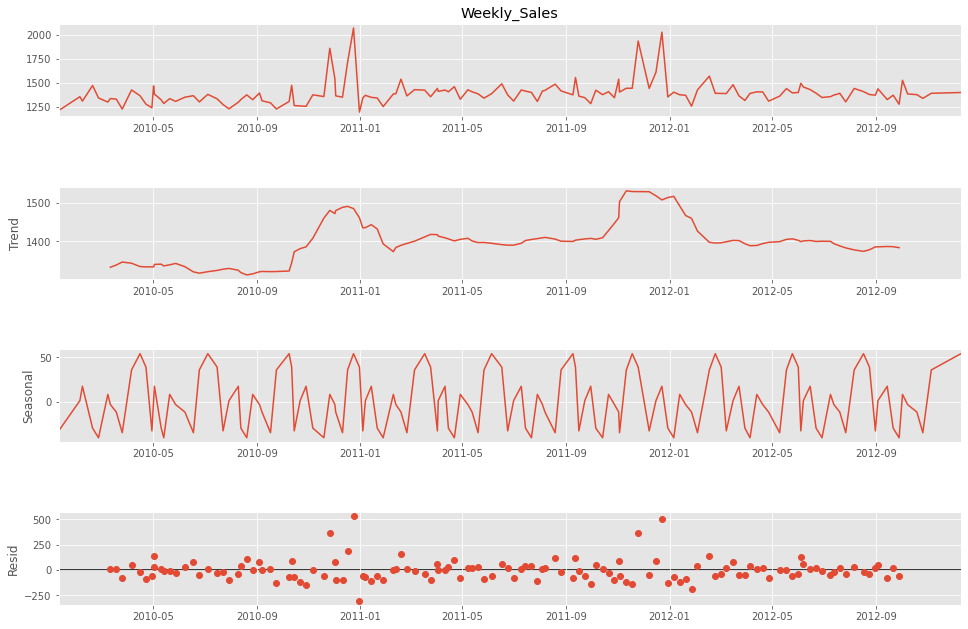

In [141]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(Sales_31.Weekly_Sales, period=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15,10)
plt.show()

<Figure size 432x288 with 0 Axes>

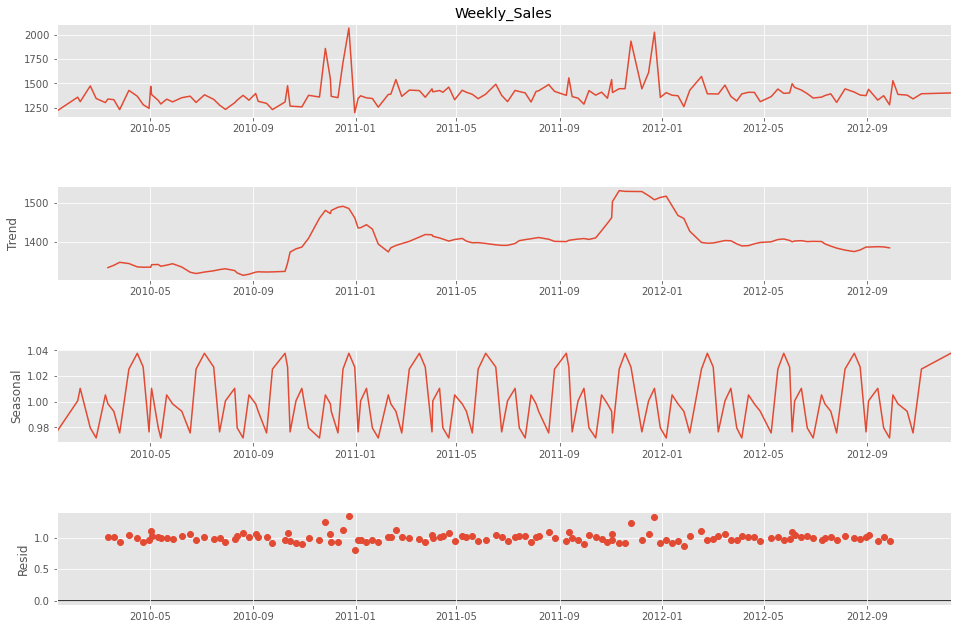

In [142]:
decomposition = seasonal_decompose(Sales_31.Weekly_Sales, model= 'multiplicative', period=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 10)
plt.show()

In [143]:
y1=Sales_31.Weekly_Sales
a2=Sales_15.Weekly_Sales
a3=Sales_40.Weekly_Sales

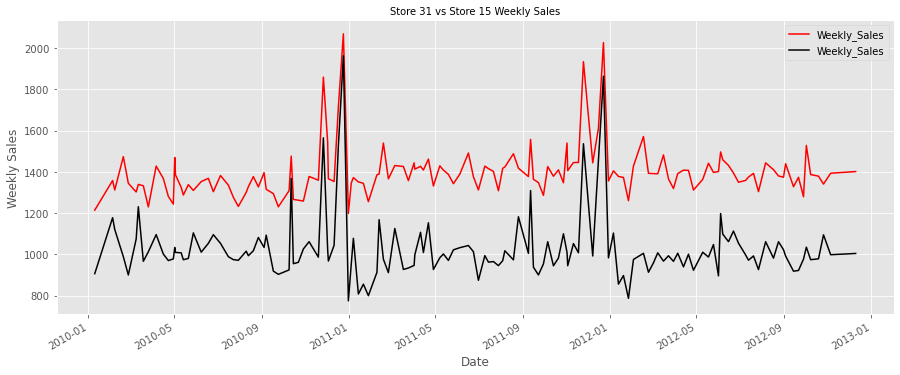

In [144]:
#To analyse the trend if any

y1.plot(figsize=(15, 6), legend=True, color = 'red')
a3.plot(figsize=(15, 6), legend=True, color = 'black')
plt.ylabel('Weekly Sales')
plt.title('Store 31 vs Store 15 Weekly Sales', fontsize = '10')
plt.show()

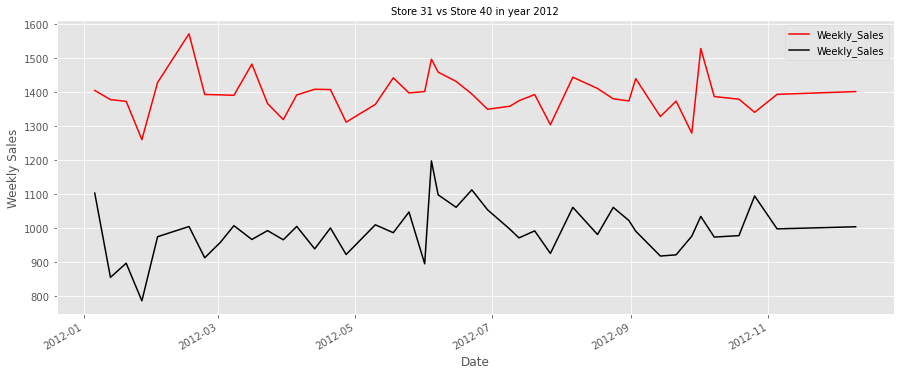

In [145]:
#Considering year 2012 as the information is not there for the whole year and is the last year in the dataset. So we have to predict after this year only.

y1['2012'].plot(figsize=(15, 6),legend=True, color = 'red')
a3['2012'].plot(figsize=(15, 6), legend=True, color = 'black')
plt.ylabel('Weekly Sales')
plt.title('Store 31 vs Store 40 in year 2012', fontsize = '10')
plt.show()

# Step 5 : Building the Model

##### 1. TIME SERIES ANALYSIS USING ARIMA

In [146]:
#P,D,Q are hyperparameters for ARIMA model in time series.

p = d = q = range(0, 5)

In [147]:
import itertools 
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, d, q))]

In [148]:
import statsmodels.tsa.arima.model as sm

mod = sm.ARIMA(y1,order=(4, 4, 3), seasonal_order=(1, 1, 0, 52), enforce_invertibility=False)

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [149]:
result = mod.fit()

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [150]:
print(result.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5553      0.695     -0.799      0.424      -1.918       0.807
ar.L2         -0.7519      0.831     -0.905      0.365      -2.380       0.876
ar.L3         -0.3819      0.858     -0.445      0.656      -2.064       1.300
ar.L4         -0.1056      0.804     -0.131      0.896      -1.681       1.470
ma.L1         -2.8099      0.731     -3.845      0.000      -4.242      -1.377
ma.L2          2.6636      1.493      1.784      0.074      -0.263       5.590
ma.L3         -0.8516      0.813     -1.048      0.295      -2.444       0.741
ar.S.L52      -0.2663      0.398     -0.669      0.504      -1.047       0.514
sigma2       4.74e+04   1.57e+04      3.016      0.003    1.66e+04    7.82e+04


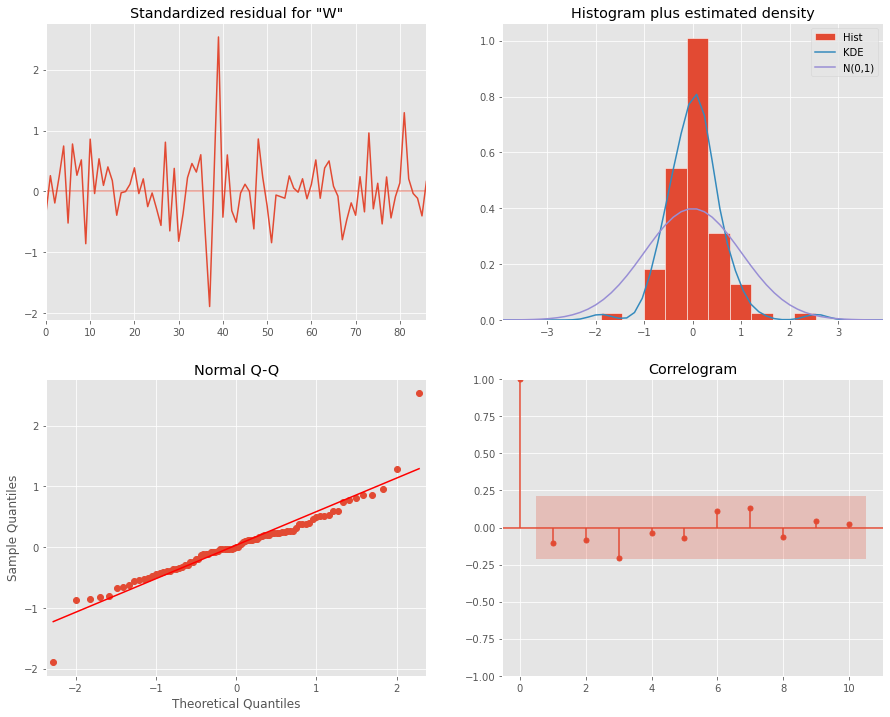

In [151]:
plt.style.use('ggplot')
result.plot_diagnostics(figsize=(15, 12))
plt.show()

##### DATA PREDICTION FOR NEXT UPCOMING YEARS

In [152]:
pred = result.get_prediction(start=pd.to_datetime('2012-07-27'), dynamic=False)
pred_ci = pred.conf_int()

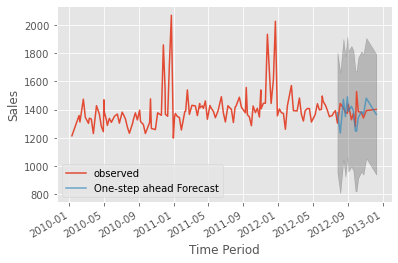

In [153]:
ax = y1['2010':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')
plt.legend()

plt.show()

In [154]:
y_forecasted = pred.predicted_mean
y_truth = y1['2012-7-27':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('MSE of our forecast is {}'.format(round(mse, 2)))

MSE of our forecast is 11453.82


In [155]:
pred_dynamic = result.get_prediction(start=pd.to_datetime('2012-7-27'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

Text(0, 0.5, 'Sales')

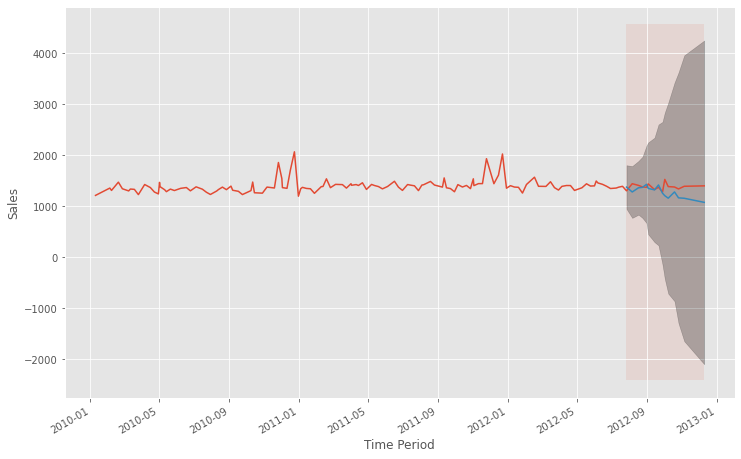

In [156]:
ax = y1['2010':].plot(label='observed', figsize=(12, 8))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2012-7-26'), y1.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')

In [157]:
y_forecasted = pred_dynamic.predicted_mean

y_truth = y1['2012-2-19':]

rmse = np.sqrt(((y_forecasted - y_truth) ** 2).mean())
print('RMSE of our forecast is {}'.format(round(rmse, 2)))

RMSE of our forecast is 163.53


In [158]:
Residual= y_forecasted - y_truth
print("Residual Value for Store 31 is",np.abs(Residual).sum())

Residual Value for Store 31 is 1885.2278321455012


In [159]:
pred_uc = result.get_forecast(steps=12)
pred_ci = pred_uc.conf_int()

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



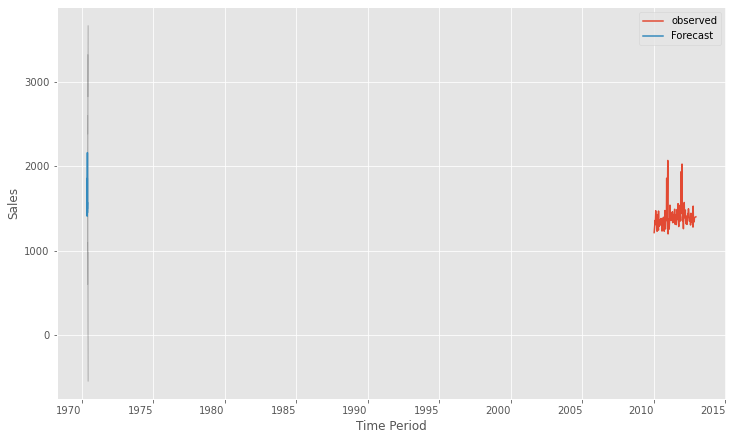

In [160]:
ax = y1.plot(label='observed', figsize=(12, 8))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')

plt.legend()
plt.show()

##### 2.USING LINEAR REGRESSION

In [217]:
X = wal[['Store','Fuel_Price','CPI','Unemployment','Day','Year']]
Y = wal['Weekly_Sales']

#Splitting the data into train test
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

Linear Regression:

Accuracy: 13.574474039898565
Mean Absolute Error: 430.4950414012666
Mean Squared Error: 276368.9461253885
Root Mean Squared Error: 525.7080426675899


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



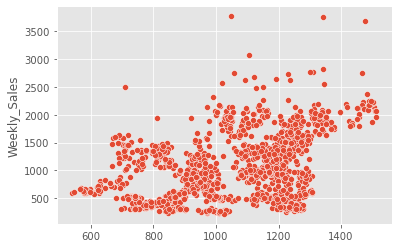

In [222]:
print('Linear Regression:')
print()
reg = LinearRegression()
reg.fit(X_train, Y_train)
Y_pred = reg.predict(X_test)
print('Accuracy:',reg.score(X_train, Y_train)*100)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
sns.scatterplot(Y_pred, Y_test)

import warnings
warnings.filterwarnings('ignore')

##### 3. USING RANDOM FOREST

Random Forest Regressor:

Accuracy: 94.05470728117676
Mean Absolute Error: 70.52559090621601
Mean Squared Error: 19573.574505713485
Root Mean Squared Error: 139.90559140260794


<AxesSubplot:ylabel='Weekly_Sales'>

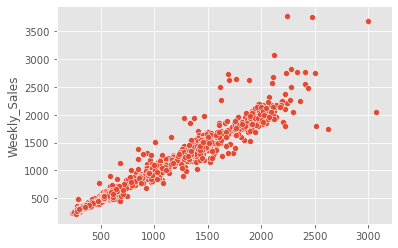

In [223]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
print('Random Forest Regressor:')
print()
rfr = RandomForestRegressor()        
rfr.fit(X_train,Y_train)
Y_pred = rfr.predict(X_test)
print('Accuracy:',rfr.score(X_test, Y_test)*100)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
sns.scatterplot(Y_pred, Y_test)


# STEP 6: INFERENCES

In our analysis, we compared the performance of three different algorithms for demand forecasting: Time Series Analysis, Linear Regression, and Random Forest Regression. Based on the results, we found that Random Forest Regression yielded the lowest Root Mean Squared Error (RMSE) of 139.90. This indicates its superior accuracy compared to the other models.

Specifically, the Time Series Analysis had an RMSE of 163.53, while Linear Regression performed less effectively with an RMSE of 525.70. These findings clearly demonstrate that Linear Regression is not the appropriate choice for our demand forecasting task, as its accuracy falls significantly short compared to Random Forest Regression.


# STEP 7: Project Outcomes & Conclusions
    

### Here are some of the key outcomes of the project:
- The Dataset was quiet small with just 6435 samples & after preprocessing 7.5% of the datasamples were dropped. 
- Visualising the distribution of data & their relationships, helped us to get some insights on the feature-set.
- The features had high multicollinearity, hence in Feature Extraction step, we shortlisted the appropriate features with VIF Technique.
- Testing multiple algorithms with default hyperparamters gave us some understanding for various models performance on this specific dataset.
- It is safe to use multiple regression algorithm performed better than other algorithms, as their scores were quiet comparable & also they're more generalisable.

In [ ]:
#<<<--------------------------------------------THE END------------------------------------------------>>>